In [1]:
import src.models
from experiments.plotting import plot_score_variable_y, plot_score_error_variable_y, load_checkpoint_w_batch_stats

from src.sdes import sde_ornstein_uhlenbeck
from tueplots import bundles, axes, cycler, figsizes
from tueplots.constants.color import palettes
import matplotlib.pyplot as plt

import orbax.checkpoint
from src.training import train_utils

Setup to load in checkpoint

In [2]:
orbax_checkpointer = orbax.checkpoint.PyTreeCheckpointer()

y_min = -1.0
max_val = 1.0
checkpoint_path = f"../../checkpoints/ou/varied_y_{y_min}_to_{max_val}"

_, restored = load_checkpoint_w_batch_stats(checkpoint_path)
model = src.models.score_mlp.ScoreMLPDistributedEndpt(**restored["network"])
trained_score = train_utils.trained_score_variable_y(model, restored["params"], {})

true_score = sde_ornstein_uhlenbeck.score

print(restored['sde'])

{'N': 100, 'T': 1.0, 'dim': 1, 'x0': [1.0], 'y': [1.0]}


In [3]:
bundle = bundles.aistats2023()
plt.rcParams.update(bundle)
axes.lines()
plt.rcParams.update(cycler.cycler(color=palettes.paultol_muted))

cmap = "PuRd"

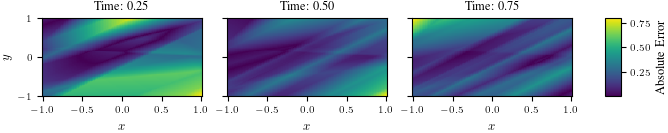

In [5]:
plt.rcParams.update(figsizes.aistats2023_full(nrows=1, ncols=3))
fig, axs = plot_score_error_variable_y(true_score, trained_score, -1, 1, -1, 1, cmap=cmap)
plt.savefig('ou_score_varied_y_-1.0_to_1.0_error.pdf')
plt.show()